In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from latexify import *
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches

In [2]:
from sklearn.datasets import load_iris

In [3]:
d = load_iris()
X = d['data'][:, :2]
y = d['target']

In [18]:
d['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

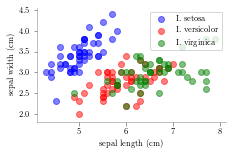

In [20]:
latexify()
colours = ['blue', 'red', 'green']
species = ['I. setosa', 'I. versicolor', 'I. virginica']
for i in range(0, 3):    
    df_ = X[y == i]
    plt.scatter(        
        df_[:, 0],        
        df_[:, 1],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )
format_axes(plt.gca())
plt.legend()
plt.xlabel(d['feature_names'][0])
plt.ylabel(d['feature_names'][1])


plt.savefig("logisitic-iris.pdf", bbox_inches="tight", transparent=True)

In [6]:
clf = LogisticRegression(penalty='none',solver='newton-cg')

In [7]:
clf.fit(X, y)

/Users/nipun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
clf.coef_

array([[-82.05203507,  70.39156348],
       [  0.129441  ,  -3.21271681],
       [  2.60252889,  -0.74578564]])

In [10]:
X.shape

(150, 2)

In [11]:
y.shape

(150,)

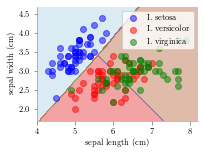

In [21]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
#plt.scatter(X[:, 0], X[:, 1], c=y)
latexify()
for i in range(0, 3):    
    df_ = X[y == i]
    plt.scatter(        
        df_[:, 0],        
        df_[:, 1],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )
format_axes(plt.gca())
plt.legend()
plt.xlabel(d['feature_names'][0])
plt.ylabel(d['feature_names'][1])
plt.savefig("logisitic-iris-prediction.pdf", bbox_inches="tight", transparent=True)